<h1>Sports Celebrity Image Classification

In [9]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

### 1) Detect face and eyes
**An image might contain multiple faces, also the face can be obstructed and not clear. The first step is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.**

***Read an image, the shape of image is 3 dimensional***

In [10]:
img = cv2.imread('./test_images/golovkin.jpg')
img.shape

(433, 650, 3)

***Show the image***

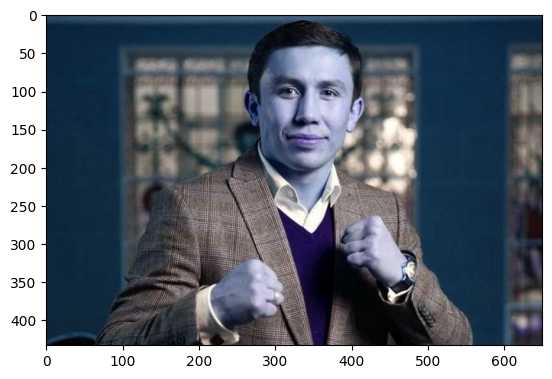

In [11]:
plt.imshow(img)

***Getting 2 dimensional image***

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(433, 650)

In [13]:
gray

array([[69, 68, 68, ..., 81, 81, 81],
       [72, 71, 71, ..., 80, 79, 79],
       [74, 74, 74, ..., 75, 76, 76],
       ...,
       [72, 68, 62, ..., 49, 48, 48],
       [65, 60, 55, ..., 48, 48, 48],
       [51, 45, 41, ..., 48, 48, 48]], dtype=uint8)

plt.imshow(gray, cmap='gray')

***Detect the face(and eyes) using opencv haarcascade***

In [15]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[271,  40, 152, 152]])

In [16]:
(x,y,w,h) = faces[0]
x,y,w,h

(271, 40, 152, 152)

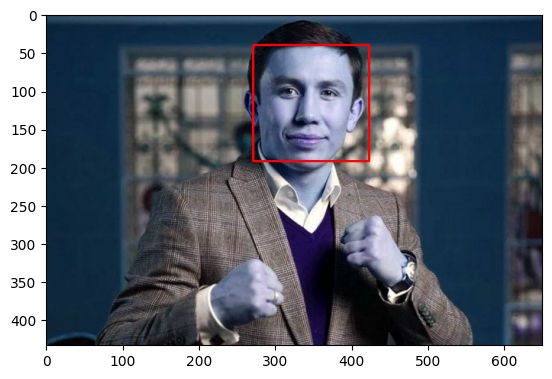

In [17]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

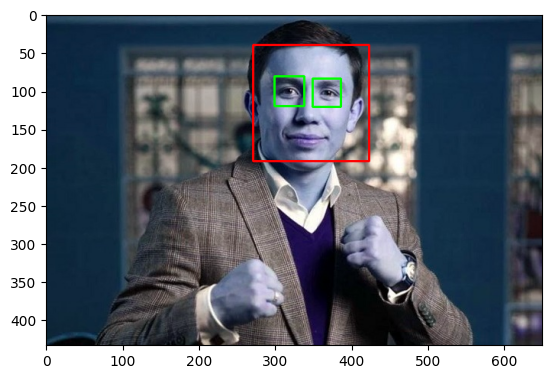

In [18]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

## 2) Crop the facial region of the image

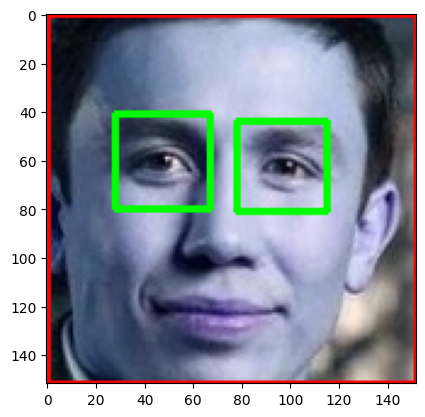

In [19]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

### 3) Load image, detect face
**Write a function that can take input image and returns cropped image if face and eyes are detected**

In [20]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

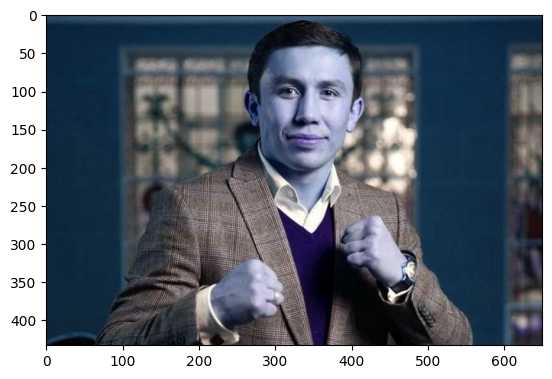

In [21]:
original_image = cv2.imread('./test_images/golovkin.jpg')
plt.imshow(original_image)

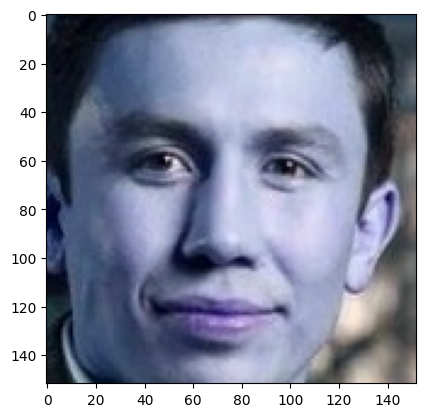

In [22]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/golovkin.jpg')
plt.imshow(cropped_image)

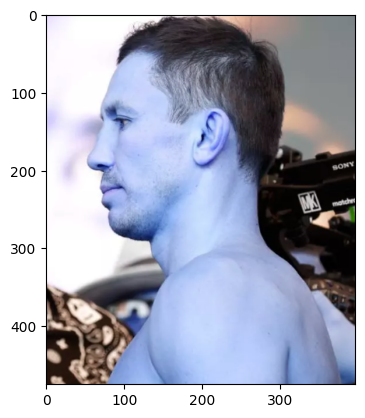

In [23]:
org_image_obstructed = cv2.imread('./test_images/golovkin_side.png')
plt.imshow(org_image_obstructed)

**In this image face doesn't have two eyes clearly visible**

In [24]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/golovkin_side.png')
cropped_image_no_2_eyes

**Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training**

In [25]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [26]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [27]:
img_dirs

['./dataset/bauyrzhan_islamkhan',
 './dataset/daniyar_yeleussinov',
 './dataset/denis_ten',
 './dataset/elena_rybakina',
 './dataset/gennady_golovkin',
 './dataset/ilya_ilyin',
 './dataset/janibek_alimkhanuly',
 './dataset/olga_rypakova',
 './dataset/shavkat_rakhmonov',
 './dataset/yeldos_smetov']

**Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code**

In [28]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [29]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1
        except cv2.error as e:
            print(f"Skipping image {entry.path} due to OpenCV error: {e}")
            continue

bauyrzhan_islamkhan
Generating cropped images in folder:  ./dataset/cropped/bauyrzhan_islamkhan
daniyar_yeleussinov
Generating cropped images in folder:  ./dataset/cropped/daniyar_yeleussinov
denis_ten
Generating cropped images in folder:  ./dataset/cropped/denis_ten
elena_rybakina
Generating cropped images in folder:  ./dataset/cropped/elena_rybakina
gennady_golovkin
Generating cropped images in folder:  ./dataset/cropped/gennady_golovkin
ilya_ilyin
Generating cropped images in folder:  ./dataset/cropped/ilya_ilyin
janibek_alimkhanuly
Generating cropped images in folder:  ./dataset/cropped/janibek_alimkhanuly
olga_rypakova
Generating cropped images in folder:  ./dataset/cropped/olga_rypakova
shavkat_rakhmonov
Generating cropped images in folder:  ./dataset/cropped/shavkat_rakhmonov
yeldos_smetov
Generating cropped images in folder:  ./dataset/cropped/yeldos_smetov


**We will collect all cropped images in "cropped" folder, and we will remove images of other persons manually**

### 4) Use wavelet transform as a feature for traning our model
**In wavelet transformed image, we can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc**

In [30]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

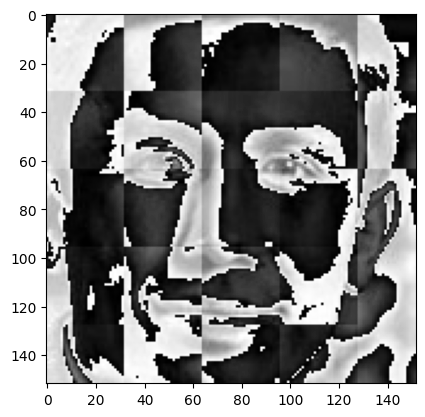

In [31]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

**We can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier**


In [32]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'bauyrzhan_islamkhan': ['./dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (1).png',
  './dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (10).png',
  './dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (100).png',
  './dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (101).png',
  './dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (102).png',
  './dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (103).png',
  './dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (104).png',
  './dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (105).png',
  './dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (106).png',
  './dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (107).png',
  './dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (108).png',
  './dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (109).png',
  './dataset/cropped/bauyrzhan_islamkhan\\bauyrzhan_islamkhan (11).png',
  './dataset/croppe

In [33]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'bauyrzhan_islamkhan': 0,
 'daniyar_yeleussinov': 1,
 'denis_ten': 2,
 'elena_rybakina': 3,
 'gennady_golovkin': 4,
 'ilya_ilyin': 5,
 'janibek_alimkhanuly': 6,
 'olga_rypakova': 7,
 'shavkat_rakhmonov': 8,
 'yeldos_smetov': 9}

**Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and Y now**


In [34]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [35]:
len(X[0])

4096

In [36]:
X[0]

array([[30],
       [37],
       [46],
       ...,
       [ 4],
       [ 2],
       [ 2]], dtype=uint8)

In [37]:
y[0]

0

In [38]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1492, 4096)

### 5) Train the model
***I will use SVM with rbf kernel tuned with heuristic finetuning***

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8927613941018767

In [41]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.83      0.88      0.85        33
           2       0.92      0.96      0.94        46
           3       0.93      0.71      0.81        35
           4       0.83      1.00      0.90        57
           5       0.83      0.94      0.88        32
           6       0.96      0.88      0.91        49
           7       0.91      1.00      0.95        21
           8       0.89      0.84      0.86        38
           9       1.00      0.76      0.86        25

    accuracy                           0.89       373
   macro avg       0.90      0.89      0.89       373
weighted avg       0.90      0.89      0.89       373



In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

***Define different candidate models, we wiil try three models and try to choose "best" performed one***

In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.888289,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.759601,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.893658,{'logisticregression__C': 5}


In [45]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [46]:
best_estimators['svm'].score(X_test,y_test)

0.9142091152815014

In [47]:
best_estimators['random_forest'].score(X_test,y_test)

0.8418230563002681

In [48]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9302949061662198

In [49]:
best_clf = best_estimators['svm']

***Lets see how many samples was predicted by visualization***

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[35,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 2, 29,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  2,  8,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2, 30,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  2,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 21,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  2, 32,  2],
       [ 0,  0,  0,  0,  2,  0,  2,  0,  0, 21]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

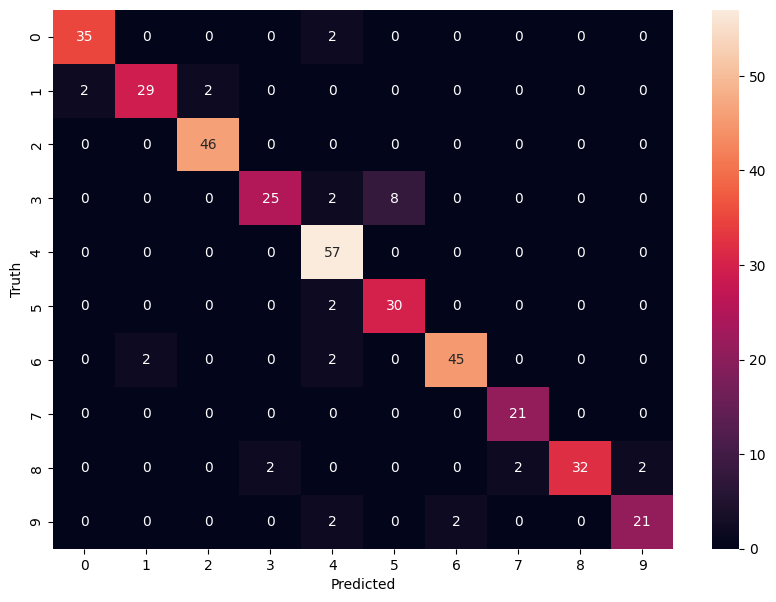

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
class_dict

{'bauyrzhan_islamkhan': 0,
 'daniyar_yeleussinov': 1,
 'denis_ten': 2,
 'elena_rybakina': 3,
 'gennady_golovkin': 4,
 'ilya_ilyin': 5,
 'janibek_alimkhanuly': 6,
 'olga_rypakova': 7,
 'shavkat_rakhmonov': 8,
 'yeldos_smetov': 9}

**Save the trained model to our file**

In [53]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\Нурбек\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


['saved_model.pkl']

**We will save our class dictionary, because it will be needed for future development**

In [54]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))